In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
#import data 
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
 10  CalorieIntake             753 non-null    float64
 11  Exercise                  768 non-null    object 
 12  SleepDuration             768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


In [5]:
# Reaarange Outcome columns 
l1=[col  for col in diabetes_df.columns if col!="Outcome"]
l1.append("Outcome")
diabetes_df=diabetes_df[l1]
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,M,148,72,35,0,33.6,0.627,50,2508.3,No,6,1
1,1,F,85,66,29,0,26.6,0.351,31,2760.0,Evening,8,0
2,0,M,183,64,0,0,23.3,0.672,32,6480.0,Morning,8,1
3,1,F,89,66,23,94,28.1,0.167,21,NaN,Evening,8,0
4,0,M,137,40,35,168,43.1,2.288,33,1970.0,No,9,1


## Data Clean


In [6]:
def data_clean(df=None):
        df["Exercise"]=df["Exercise"].replace({"No":1,"Evening":2,"Morning":3,"Both":4}).astype(int)
        df["Gender"]=df["Gender"].replace({"M":1,"F":0}).astype(int)
        df["CalorieIntake"].fillna(df["CalorieIntake"].median(),inplace=True)
        return df
    
    
diabetes_df_clean=data_clean(diabetes_df)

In [7]:
diabetes_df_clean.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,1,148,72,35,0,33.6,0.627,50,2508.3,1,6,1
1,1,0,85,66,29,0,26.6,0.351,31,2760.0,2,8,0
2,0,1,183,64,0,0,23.3,0.672,32,6480.0,3,8,1
3,1,0,89,66,23,94,28.1,0.167,21,2893.0,2,8,0
4,0,1,137,40,35,168,43.1,2.288,33,1970.0,1,9,1


<b> seaborn Through visualization </b>

In [8]:
# sns.pairplot(diabetes_df_clean,hue="Outcome")

## Visuliazation Of Data by LDA


In [9]:
#lda_df use for Without affecting clean dataframe
Lda_df=diabetes_df_clean.copy()

In [10]:
X=Lda_df.iloc[:,:-1]
y=Lda_df.iloc[:,-1]


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis("eigen",n_components=1)

X_r1=clf1.fit(X,y).transform(X)
l2=np.ones(len(X_r1))  ## dummy variable use for X_train,X_test because they not allow 1-D array

lda_df=pd.DataFrame(data=np.column_stack([X_r1,l2,diabetes_df_clean["Outcome"]]),columns=["X_r1","l2","Outcome"])

In [14]:
lda_df

,X_r1,l2,Outcome
0,5.378751,1.0,1.0
1,3.951466,1.0,0.0
2,6.559834,1.0,1.0
3,3.996132,1.0,0.0
4,6.262587,1.0,1.0
...,...,...,...
763,2.882233,1.0,0.0
764,3.653800,1.0,0.0
765,3.778974,1.0,0.0
766,7.750035,1.0,1.0


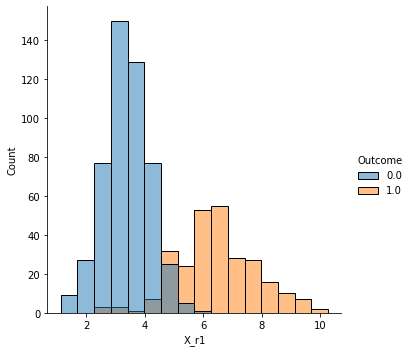

In [15]:
sns.displot(x=lda_df["X_r1"],hue=lda_df["Outcome"])

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(lda_df.iloc[:,:-1],lda_df["Outcome"],test_size=0.33)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pre=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       168
         1.0       0.97      0.81      0.89        86

    accuracy                           0.93       254
   macro avg       0.94      0.90      0.92       254
weighted avg       0.93      0.93      0.93       254



<b>Conclusion:</b> Here We can see LDA  transformation gives best Results  <strong>0.85 recall</strong> is the best because Here  We don't Want to Consider Diabetes Patient as normal person
<b>Note:</b> We don't perform <b>scaling </b> and </b>balanced</b> dataset operation we will do ahead.

## <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a>

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_embedded=pca.fit_transform(X)

pca_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
pca_df["Outcome"]=y

In [22]:
pca_df.head()

,x1,x2,Outcome
0,-1117.059750,-67.133801,1
1,-865.801159,-75.117454,0
2,2854.635956,-98.226393,1
3,-732.088672,17.309048,0
4,-1654.140145,102.883393,1


<p> Below plot capture Overall Data shape By PCA  </p> 

<AxesSubplot:xlabel='x1', ylabel='x2'>

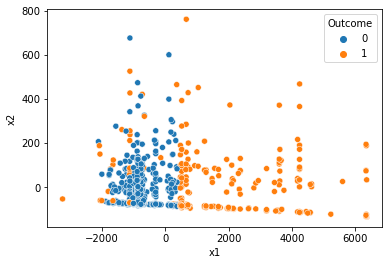

In [24]:
sns.scatterplot(data=pca_df,x='x1',y="x2",hue="Outcome")

## <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"> T-SNE </a>

Another Unsupervised Machine learning Algorithms

In [26]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=30.0,n_iter=5000).fit_transform(X)
X_embedded.shape

(768, 2)

In [27]:
t_sne_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
t_sne_df["Outcome"]=y

In [28]:
t_sne_df

,x1,x2,Outcome
0,-0.317606,-33.770275,1
1,15.359135,-1.809881,0
2,-44.311665,-0.270399,1
3,38.817532,1.010725,0
4,17.543386,-48.574162,1
...,...,...,...
763,36.638355,-3.534835,0
764,20.166225,42.598534,0
765,16.769964,44.188957,0
766,-48.569813,-12.225360,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

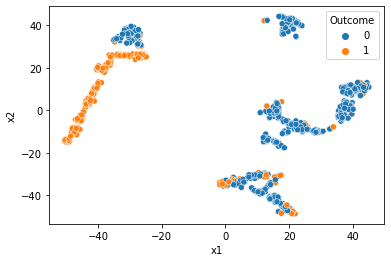

In [29]:
sns.scatterplot(data=t_sne_df,x='x1',y="x2",hue='Outcome')

## Feature Selection

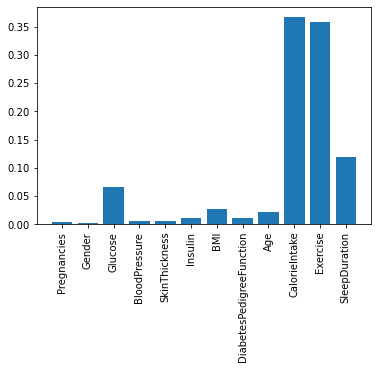

In [32]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
map_dict={}
for i,v in zip(X.columns,importance):
#          print('Feature: %0d, Score: %.5f' % (i,v))/abs
         map_dict[i]=v
    
    
# plot feature importance
pyplot.bar(X.columns, importance)
pyplot.xticks(rotation=90)
pyplot.show()

<b>Note</b>
- Glucose :- Glucose Level increase then Diabetes chance Increase
- CalorieIntake :- per day how many calorieIntake? if people take more calories than fat and sugar level increase                    so Diabetes chances Increase 
- Excercise :- In Every disease excercise will perform major role
- sleepDuration :- If someone take less sleep it's also increase chance of diabetes, our body needs good sleep 
- BMI :- Overweighted person have more probability with context of diabetes.

Other Factor Also play important role in Diabetes but we needs higher important feature so we would select above  5 Feature. 

In [33]:
map_dict_list=dict(sorted(map_dict.items(),key=lambda kv: kv[1],reverse=True))

In [34]:
map_dict_list

{'CalorieIntake': 0.3666661596274284,
 'Exercise': 0.35814760558753705,
 'SleepDuration': 0.11994881876008312,
 'Glucose': 0.06543325508752007,
 'BMI': 0.02659010117913522,
 'Age': 0.02210104400814254,
 'DiabetesPedigreeFunction': 0.011512695637795417,
 'Insulin': 0.011252329539574299,
 'BloodPressure': 0.006576375322386489,
 'SkinThickness': 0.005761968675178871,
 'Pregnancies': 0.003709328522392456,
 'Gender': 0.0023003180528260417}

In [35]:
X=X[list(map_dict_list.keys())[:5]]
y=y

In [36]:
##

## General Class For ML Algorithms

### Below Class have ability to make our data scale,handle imbalance dataset,fitting,validation and visualization.

In [430]:
class Ml_Model(object):

    def __init__(self, *arg, scaling=False, balance=False, Oversampling=False):
        import numpy as np
        self.X = arg[0]
        self.y = arg[1]
        self.sc=None
        self.score_dict=None
        
        self.scaling=scaling
   
        if balance:

            if not Oversampling:
                from imblearn.under_sampling import RandomUnderSampler
                b = RandomUnderSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

            else:
                from imblearn.over_sampling import RandomOverSampler
                b = RandomOverSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

        if not scaling:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y)

        else:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y,random_state=34)

            self.sc = StandardScaler()
            self.X_train = self.sc.fit_transform(self.X_train)
            self.X_test = self.sc.transform(self.X_test)
            
            
    def train_test_split_obj(self):
        
        return (self.X_train,self.X_test,self.y_train,self.y_test)

    def pass_classifier(self, clf=None):
        self.clf = clf
        print(clf)

        return self.clf

    def fit_method_and_score(self):

        clf.fit(self.X_train, self.y_train)

        return clf.predict(self.X_test)

    def classification_report(self):
        self.y_pred = self.clf.predict(self.X_test)
        from sklearn.metrics import classification_report
        return print(classification_report(self.y_test, self.y_pred))

    def plot_mushroom_boundary(self, X, y, fitted_model):

        plt.figure(figsize=(9.8, 5), dpi=100)
        X = X
        y = y
        for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
            plt.subplot(1, 2, i+1)

            mesh_step_size = 0.01  # step size in the mesh
            x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
            y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(
                y_min, y_max, mesh_step_size))
            if i == 0:
                Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
            else:
                try:
                    Z = fitted_model.predict_proba(
                        np.c_[xx.ravel(), yy.ravel()])[:, 1]
                except:
                    plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                             verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
                    plt.axis('off')
                    break
            Z = Z.reshape(xx.shape)
            plt.scatter(X[y.values == 0, 0], X[y.values == 0, 1],
                        alpha=0.4, label="0", s=5)
            plt.scatter(X[y.values == 1, 0], X[y.values == 1, 1],
                        alpha=0.4, label="1", s=5)
            plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15,
                       extent=(x_min, x_max, y_min, y_max), origin='lower')
            plt.title(plot_type + '\n' +
                      str(fitted_model).split('(')[0] + ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
            plt.gca().set_aspect('equal')

        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

    def validation(self):

        from sklearn.model_selection import StratifiedKFold
        from sklearn.metrics import f1_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from colorama import Fore, Back, Style

        lst_accu_stratified = []
        lst_recall_stratified = []
        lst_precision_stratified = []

        lst_f1_score_stratified = []
        x = 0
        skf = StratifiedKFold(n_splits=18, shuffle=True, random_state=1)
      
        for train_index, test_index in skf.split(self.X, self.y):
            x_train_fold, x_test_fold = self.X.loc[train_index,
                                                   :], self.X.loc[test_index, :]
            y_train_fold, y_test_fold = self.y[train_index], self.y[test_index]

            if not self.scaling :
                         self.clf.fit(x_train_fold, y_train_fold)
                         y_pre = clf.predict(self.X_test)
            else:
               
                from sklearn.preprocessing import StandardScaler
                sc=StandardScaler()
                x_train_fold = sc.fit_transform(x_train_fold)
                x_test_fold = sc.transform(x_test_fold)
                clf.fit(x_train_fold, y_train_fold)
                y_pre = clf.predict(self.X_test)


#                 print(classification_report(self.y_test,y_pre))

            lst_accu_stratified.append(
                round(accuracy_score(self.y_test, y_pre), 4))
            lst_recall_stratified.append(
                round(recall_score(self.y_test, y_pre), 4))
            lst_f1_score_stratified.append(
                round(f1_score(self.y_test, y_pre), 4))
            lst_precision_stratified.append(
                round(precision_score(self.y_test, y_pre), 4))

            
        self.score_dict=dict(zip(["Accuracy", "Recall", "Precision", "F1-Score"],
                            [lst_accu_stratified, lst_recall_stratified, lst_precision_stratified, lst_f1_score_stratified]))
        
        for i, j in zip(["Accuracy", "Recall", "Precision", "F1-Score"], [lst_accu_stratified, lst_recall_stratified, lst_precision_stratified, lst_f1_score_stratified]):

            print(Fore.BLUE+f"\n\n{i} ")
            print(Style.RESET_ALL)

            print(f'List of possible {i} Score:\n', j)

            print(f'\nMaximum {i} Score That can be obtained from this model is:', max(
                j)*100, '%')
            print(f'\nMinimum {i} Score:', min(j)*100, '%')
            print(
                f'\nAverage {i} Score That can be obtained from this model is::', np.mean(j))
            print(
                f'\nMedian {i} Score That can be obtained from this model is::', np.median(j))
            print('\nStandard Deviation is:', np.std(j))
            
        return None
            
    def score_return(self,score="F1-Score"):
            
            try :
                 return (score,self.score_dict[score])

            except KeyError :
                    print()
                    print(Fore.RED+"KeyError : please follow  given list score format for gaining score list that created by validation function\n"+
                          ":[Accuracy,Recall,Precision,F1-Score]")


                    print()
                
       
            
            

    def visualization(self):
        from colorama import Fore, Back, Style
        print()
        print(Fore.BLUE+"\n Below Test Acurracy Based On PCA")
        from sklearn.model_selection import train_test_split
        from imblearn.under_sampling import RandomUnderSampler
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2,)
        X_embedded = pca.fit_transform(self.X)
        sc = StandardScaler()

        y_pca = self.y
        X_pca = X_embedded
        X_pca = sc.fit_transform(X_pca)
        b = RandomUnderSampler(sampling_strategy=1)
        X_pca_balance, y_pca_balance = b.fit_resample(X_pca, y_pca)

        X_pca_balance_train, X_pca_balance_test, y_pca_balance_train, y_pca_balance_test = train_test_split(
            X_pca_balance, y_pca_balance)

        model = self.clf
        model.fit(X_pca_balance_train, y_pca_balance_train)
        model.score(X_pca_balance_test, y_pca_balance_test)
        self.plot_mushroom_boundary(X_pca_balance_test, y_pca_balance_test, model)

<b style="font-size:16px">Aim:</b><b style="font-size:16px; color:green"> Don't Forget Our Main is Aim to identify the diabetes person and it's represented by 1
so our main focus on       Recall </b>

## LDA 

LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       0.96      0.85      0.90        61

    accuracy                           0.92       134
   macro avg       0.93      0.91      0.92       134
weighted avg       0.92      0.92      0.92       134



 Below Test Acurracy Based On PCA


Accuracy 

List of possible Accuracy Score:
 [0.9179, 0.9179, 0.9179, 0.9104, 0.9328, 0.9328, 0.9254, 0.9179, 0.9328, 0.9254, 0.9254, 0.9254, 0.9254, 0.9104, 0.9104, 0.9254, 0.9254, 0.9254]

Maximum Accuracy Score That can be obtained from this model is: 93.28 %

Minimum Accuracy Score: 91.03999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.9224666666666665

Median Accuracy Score That can be obtained from this model is:: 0.9254

Standard Deviation is: 0.007107898579905459


Recall 

List of possible Recall Score:
 [0.8525, 0.8361, 0.8525, 0.8361, 0.8852, 0.8852, 0.86

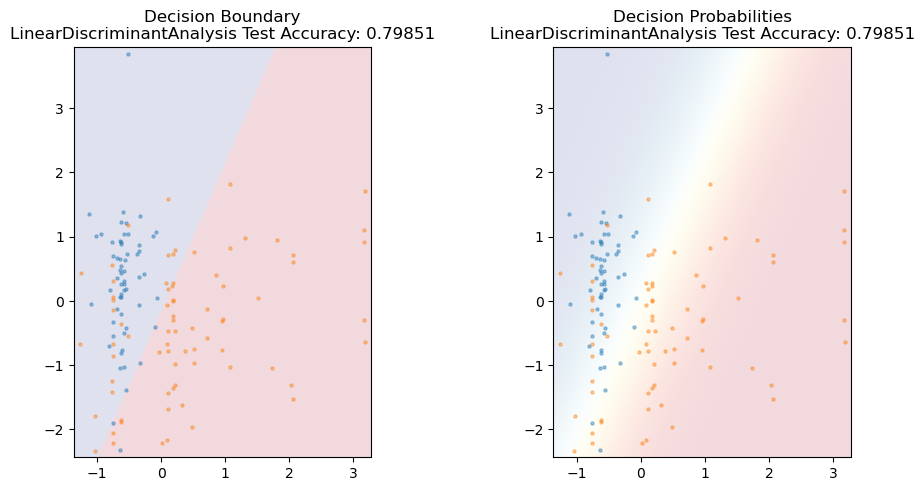

In [431]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m1=Ml_Model(X,y,scaling=True,balance=True,Oversampling=False)
clf=LinearDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()

m1.visualization()
m1.validation()

<b> Conclusion : </b> LDA is do pretty good job on recall Median=0.9 and f1-score 0.94.

**Nomination Start**

Nomination List: ["LDA"] 

**In The Race Now Winner is**: LDA


<b style="color:blue"> We Build Box Plot For Comaparision Our </b>

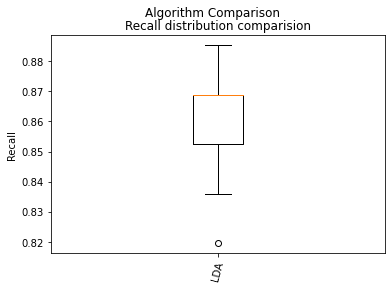

In [432]:
recall=m1.score_return(score="Recall")[1]
recall_list=[recall]
names=["LDA"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(recall_list)
ax.set_xticklabels(names)
plt.title("Recall distribution comparision")
plt.ylabel("Recall")
plt.xticks(rotation=75)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([0.88,np.max(recall_list)+0.020])

# plt.yticks(np.arange(0.90, np.max(recall_list)+0.02, 0.01))


plt.show()

## QDA

QuadraticDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.94      0.97      0.95        61

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134



Accuracy 

List of possible Accuracy Score:
 [0.9478, 0.9552, 0.9552, 0.9552, 0.9478, 0.9552, 0.9627, 0.9478, 0.9701, 0.9478, 0.9627, 0.9627, 0.9627, 0.9627, 0.9627, 0.9552, 0.9701, 0.9552]

Maximum Accuracy Score That can be obtained from this model is: 97.00999999999999 %

Minimum Accuracy Score: 94.78 %

Average Accuracy Score That can be obtained from this model is:: 0.9577111111111112

Median Accuracy Score That can be obtained from this model is:: 0.9552

Standard Deviation is: 0.007020041855596084


Recall 

List of possible Recall Score:
 [0.9508, 0.9672, 0.9672, 0.9508, 0.9508, 0.9672, 0.9672, 0.9508, 0.9672, 0.9508, 0.967

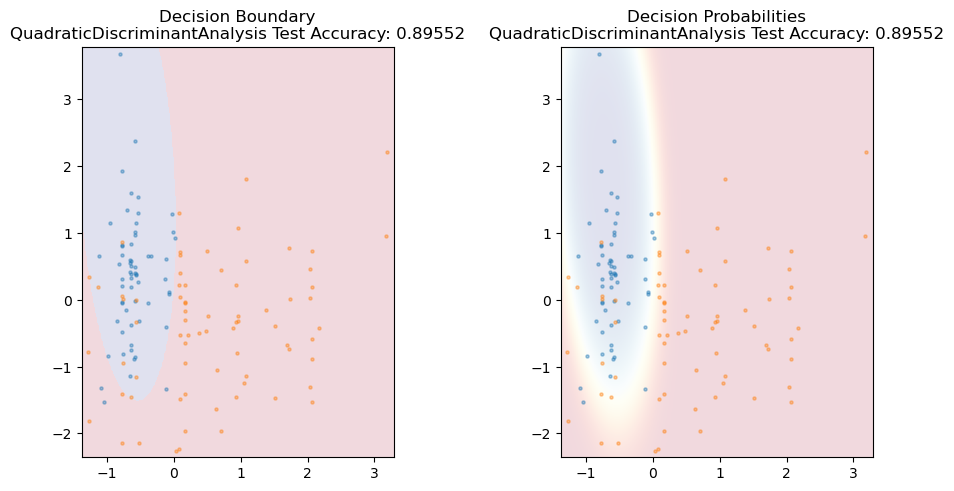

In [433]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=QuadraticDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

<b> Conclusion : </b> If LDA perform well then QDA Definetly perform well and QDA get simliar recall 

QDA is do pretty good job.
-Nomination List: ["QDA",LDA"] 





In [434]:
names

['LDA']

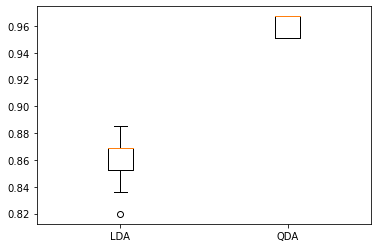

In [435]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("QDA")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> QDA is clearly won
<br>
**In The Race Now Winner is**: QDA

## SVM

SVC()
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        73
           1       1.00      0.95      0.97        61

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134



Accuracy 

List of possible Accuracy Score:
 [0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776, 0.9776]

Maximum Accuracy Score That can be obtained from this model is: 97.76 %

Minimum Accuracy Score: 97.76 %

Average Accuracy Score That can be obtained from this model is:: 0.9775999999999999

Median Accuracy Score That can be obtained from this model is:: 0.9776

Standard Deviation is: 1.1102230246251565e-16


Recall 

List of possible Recall Score:
 [0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0.9508, 0

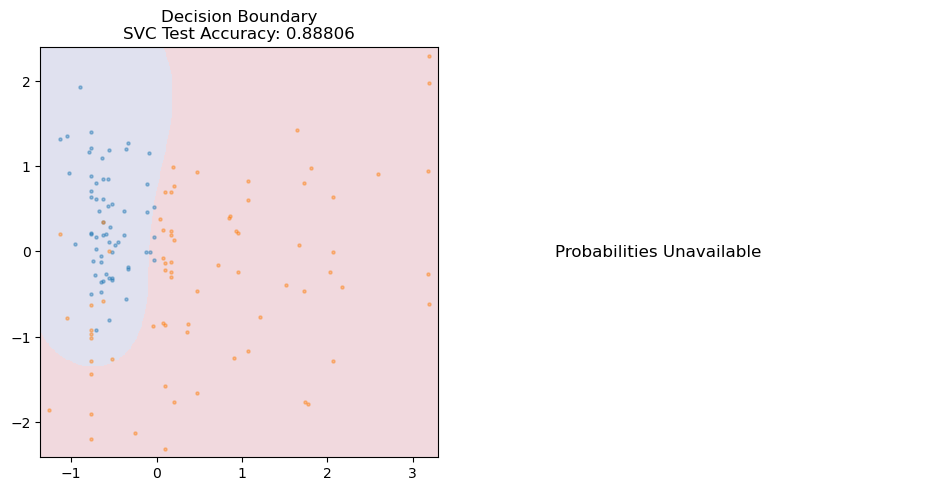

In [436]:
from sklearn.svm import SVC
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=SVC()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()


    



<b> Nomination List</b>: ["QDA","SVM",LDA"] 





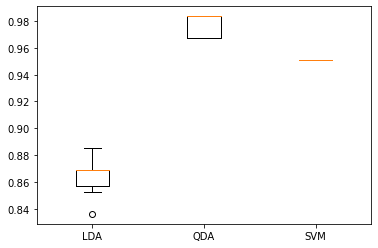

In [310]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("SVM")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> Svm doing great job on Recall(median) with standard deviation
    ,So Both QDA and SVM give us almost same results
<br>
**In The Race Now Winner is**: QDA is still winner



<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistics Regression</a> </h2>

LogisticRegression(C=1, max_iter=1000)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.97      0.93      0.95        61

    accuracy                           0.96       134
   macro avg       0.96      0.95      0.95       134
weighted avg       0.96      0.96      0.96       134



Accuracy 

List of possible Accuracy Score:
 [0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9403]

Maximum Accuracy Score That can be obtained from this model is: 95.52000000000001 %

Minimum Accuracy Score: 94.03 %

Average Accuracy Score That can be obtained from this model is:: 0.9543722222222224

Median Accuracy Score That can be obtained from this model is:: 0.9552

Standard Deviation is: 0.003413015212316847


Recall 

List of possible Recall Score:
 [0.9344, 0.9344, 0.9344, 0.9344, 0.9344, 0.9344, 0.9344, 0.9344, 0.9344, 0.9344

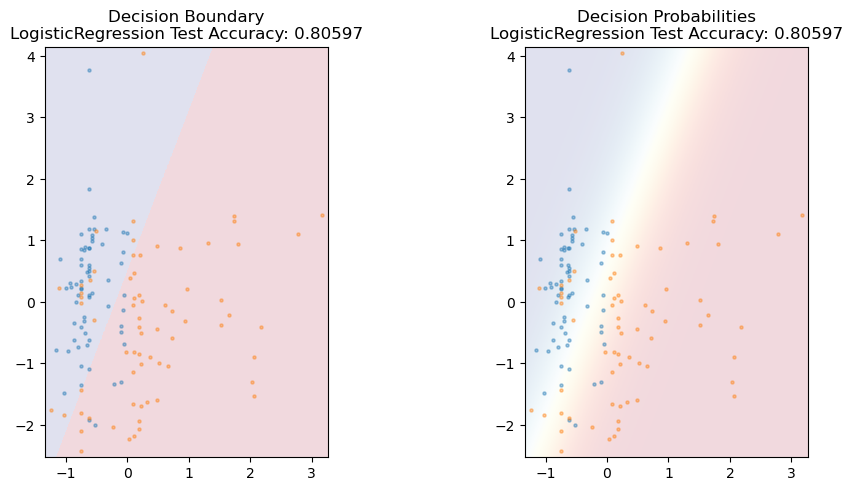

In [437]:
from sklearn.linear_model import LogisticRegression

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=LogisticRegression(max_iter=1000,C=1)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()


<b> Nomination List</b>: ["QDA","SVM",LDA","Lg"] 

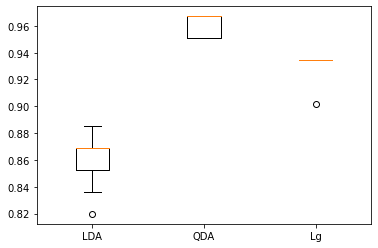

In [438]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("Lg")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> Still QDA is  Winner
<br>
**In The Race Now Winner is**: QDA 

## MLP Classifier

MLPClassifier()
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.98      0.95      0.97        61

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



Accuracy 

List of possible Accuracy Score:
 [0.9851, 0.9776, 0.9776, 0.9776, 0.9851, 0.9776, 0.9776, 0.9776, 0.9776, 0.9701, 0.9776, 0.9776, 0.9776, 0.9701, 0.9776, 0.9776, 0.9776, 0.9776]

Maximum Accuracy Score That can be obtained from this model is: 98.50999999999999 %

Minimum Accuracy Score: 97.00999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.9775999999999999

Median Accuracy Score That can be obtained from this model is:: 0.9776

Standard Deviation is: 0.0035355339059327407


Recall 

List of possible Recall Score:
 [0.9672, 0.9508, 0.9508, 0.9508, 0.9672, 0.9672, 0.9508, 0.9508, 0.9672, 0.9508, 0.9508, 

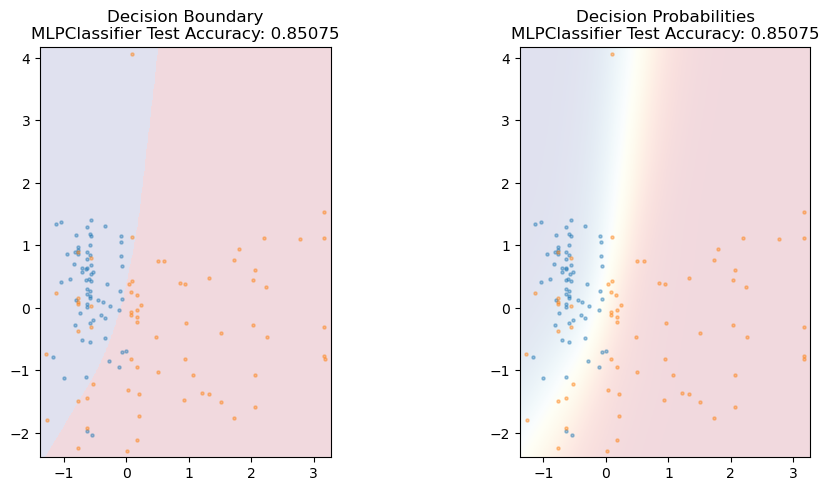

In [439]:
from sklearn.neural_network import MLPClassifier

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=MLPClassifier()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()


<b> Nomination List</b>: ["QDA","SVM","LDA","Lg","MLP"] 

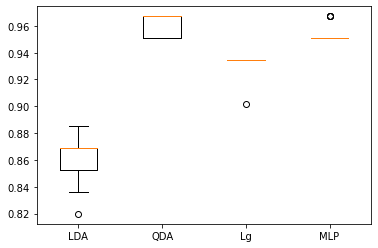

In [440]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("MLP")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> MLP is doing great job without good parameter so in competition we have two algo
(QDA,MLP) Note: neural network has capability of non-linear functionality
<br>
**In The Race Now Winner is**: ["QDA","MLP"] 

<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN Algorithms</a> </h2>

KNeighborsClassifier(n_jobs=-1, p=1.5, weights='distance')
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.94      0.97      0.95        61

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134



Accuracy 

List of possible Accuracy Score:
 [1.0, 1.0, 1.0, 1.0, 0.9925, 1.0, 1.0, 1.0, 0.9925, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9925, 1.0, 1.0, 1.0]

Maximum Accuracy Score That can be obtained from this model is: 100.0 %

Minimum Accuracy Score: 99.25 %

Average Accuracy Score That can be obtained from this model is:: 0.9987499999999999

Median Accuracy Score That can be obtained from this model is:: 1.0

Standard Deviation is: 0.002795084971874719


Recall 

List of possible Recall Score:
 [1.0, 1.0, 1.0, 1.0, 0.9836, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9836, 1.0, 1.0, 1.0]

Maximum Recall Score 

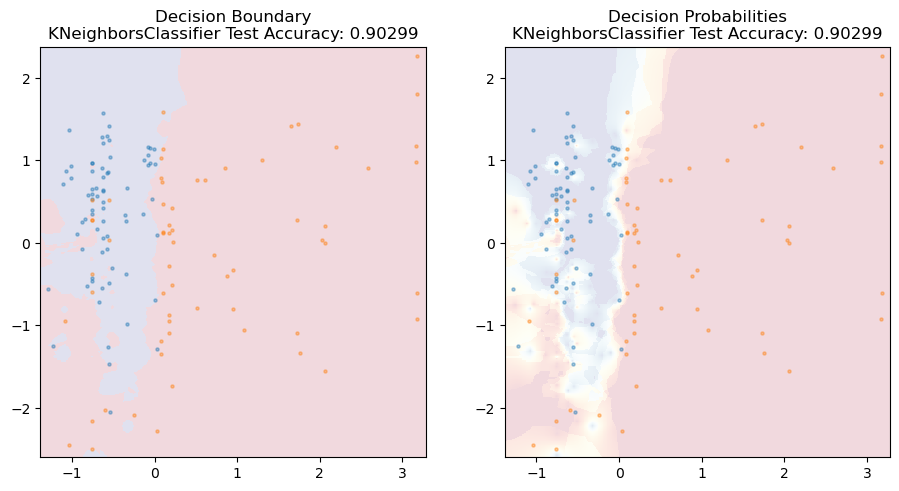

In [441]:
from sklearn.neighbors import KNeighborsClassifier
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=KNeighborsClassifier(p=1.5,n_jobs=-1,n_neighbors=5,weights="distance") 
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()


<b> Nomination List</b>: ["QDA","SVM","LDA","Lg","MLP","KNN"] 

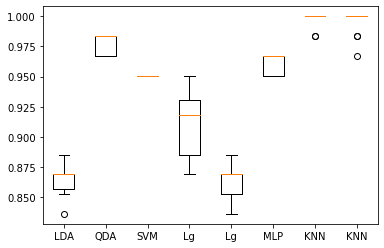

In [323]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("KNN")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b>KNN Algorithms wins But KNN is Not Learning somethings from data so it's  highly unstable for prediction.
<br>
**In The Race Now Winner is**: ["QDA","MLP"] 

## Decision Tree 

### with prepruning

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=20,
                       min_samples_split=8)
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        73
           1       1.00      0.87      0.93        61

    accuracy                           0.94       134
   macro avg       0.95      0.93      0.94       134
weighted avg       0.95      0.94      0.94       134



Accuracy 

List of possible Accuracy Score:
 [0.9851, 0.8955, 0.9851, 0.9925, 0.9851, 0.9851, 0.9925, 0.9403, 0.8806, 0.9851, 0.9776, 0.9851, 0.9851, 0.9851, 0.9478, 0.9851, 0.9925, 0.9925]

Maximum Accuracy Score That can be obtained from this model is: 99.25 %

Minimum Accuracy Score: 88.06 %

Average Accuracy Score That can be obtained from this model is:: 0.9709833333333333

Median Accuracy Score That can be obtained from this model is:: 0.9851

Standard Deviation is: 0.03251921227008223


Recall 

List of possible Recall Score:
 [1.0, 0.8197, 

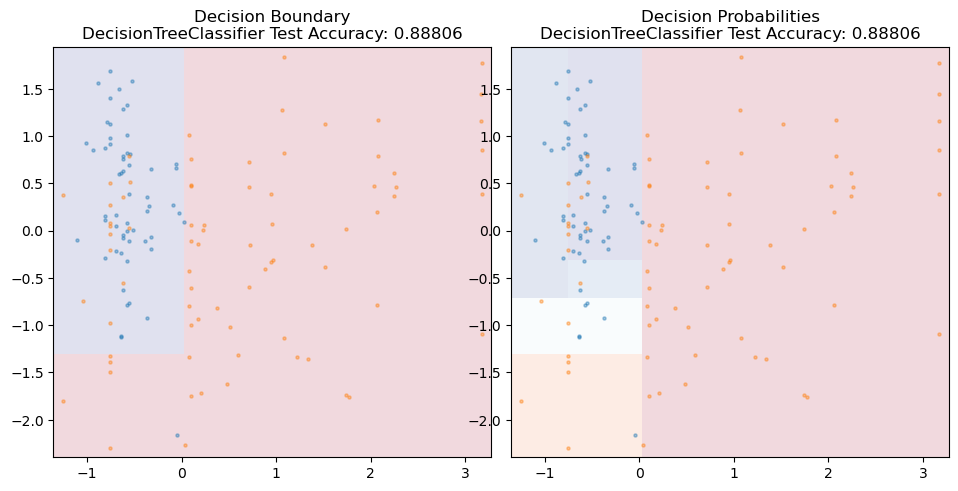

In [442]:
from sklearn.tree import DecisionTreeClassifier
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=DecisionTreeClassifier(max_depth=4,max_features=2,min_samples_leaf=20,min_samples_split=8)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

### Extra Experiments By Post-Prunings

In [443]:
X_train_dc=m1.train_test_split_obj()[0]
X_test_dc=m1.train_test_split_obj()[1]
y_train_dc=m1.train_test_split_obj()[2]
y_test_dc=m1.train_test_split_obj()[3]


In [444]:
Dc=DecisionTreeClassifier()
Dc.fit(X_train_dc,y_train_dc)

DecisionTreeClassifier()

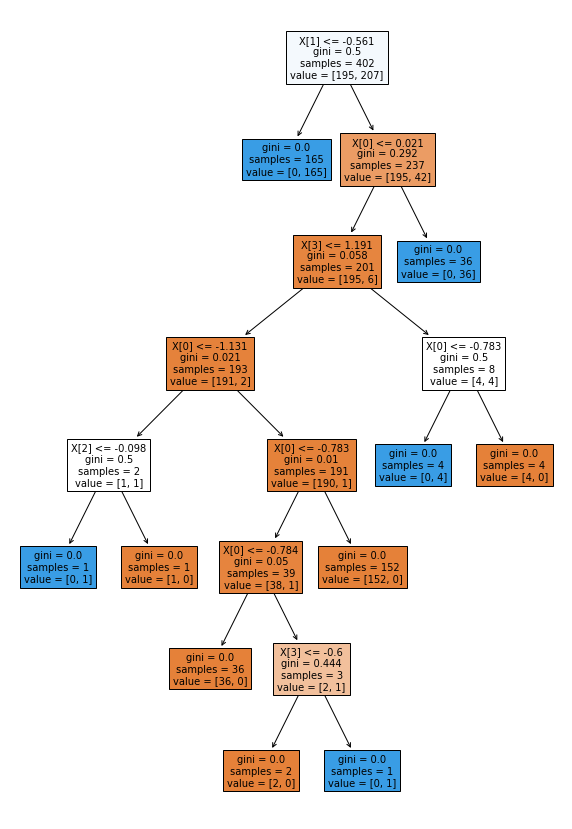

In [445]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(Dc,filled=True)
plt.show()

In [446]:
path=Dc.cost_complexity_pruning_path(X_train_dc,y_train_dc)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [447]:
ccp_alphas

array([0.        , 0.00164969, 0.00244903, 0.00955627, 0.1429655 ,
       0.32762928])

In [448]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.32762928226804766


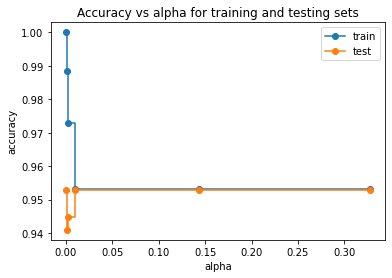

In [449]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


<b> Nomination List</b>: ["QDA","SVM","LDA","Lg","MLP","KNN","Decision Tree"] 

DecisionTreeClassifier(ccp_alpha=0.02)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.99      0.99        67

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



Accuracy 

List of possible Accuracy Score:
 [0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9851, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925, 0.9925]

Maximum Accuracy Score That can be obtained from this model is: 99.25 %

Minimum Accuracy Score: 98.50999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.992088888888889

Median Accuracy Score That can be obtained from this model is:: 0.9925

Standard Deviation is: 0.0016950545349761663


Recall 

List of possible Recall Score:
 [0.9851, 0.9851, 0.9851, 0.9851, 0.9851, 0.9851, 0.9851, 0.9701, 0.9851, 0.9851

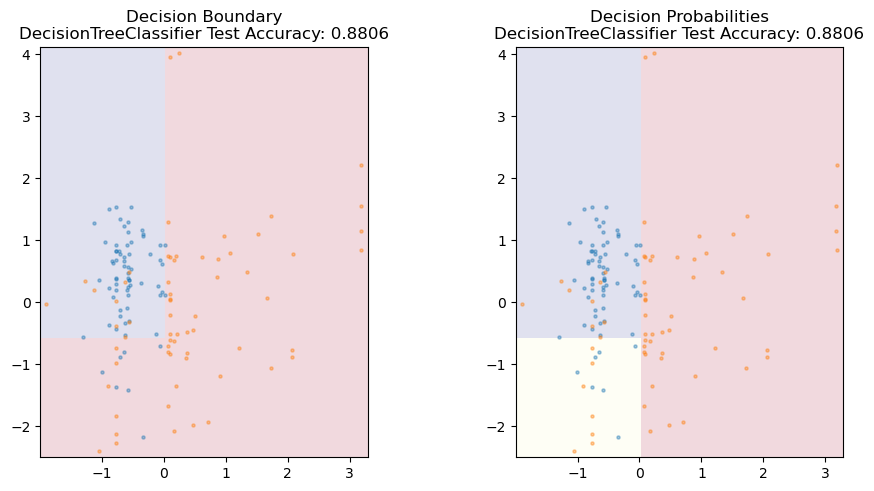

In [450]:
m1=Ml_Model(X,y,balance=True)
clf=DecisionTreeClassifier(ccp_alpha=0.02)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

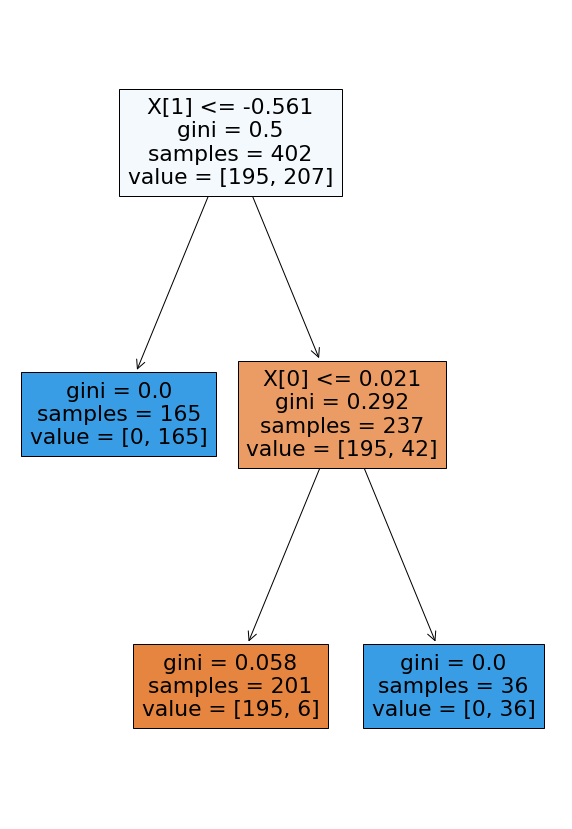

In [451]:
from sklearn import tree
plt.figure(figsize=(10,15))
test=DecisionTreeClassifier(ccp_alpha=0.14)
test.fit(X_train_dc,y_train_dc)
tree.plot_tree(test,filled=True)
plt.show()

## Here is Decision Tree overcome their overfiting

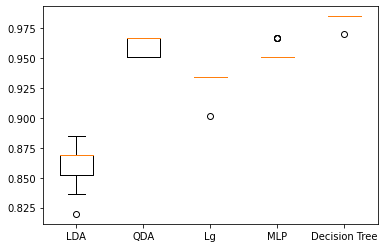

In [452]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("Decision Tree")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> Decision Tree is have less variance so DT is good competeitor but Still Arbitrary Decision boundry win
<br>
**In The Race Now Winners Are**: ["QDA","MLP","DT"] 

## Random Forest

RandomForestClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=10)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       1.00      0.98      0.99        59

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



Accuracy 

List of possible Accuracy Score:
 [0.9896, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9896, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948, 0.9948]

Maximum Accuracy Score That can be obtained from this model is: 99.48 %

Minimum Accuracy Score: 98.96000000000001 %

Average Accuracy Score That can be obtained from this model is:: 0.9942222222222225

Median Accuracy Score That can be obtained from this model is:: 0.9948

Standard Deviation is: 0.0016342023387422376


Recall 

List of poss

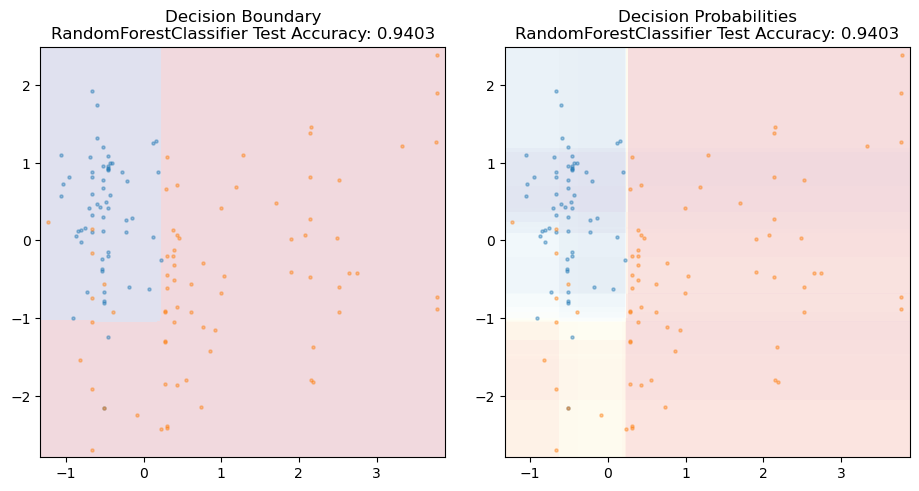

In [453]:

from sklearn.ensemble import RandomForestClassifier
m1=Ml_Model(X,y)
clf=RandomForestClassifier(n_estimators=10,max_leaf_nodes=5,max_depth=3,min_samples_split=20,min_samples_leaf=15)

m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()


<b> Nomination List</b>: ["QDA","SVM","LDA","Lg","MLP","KNN","Decision Tree","RF] 

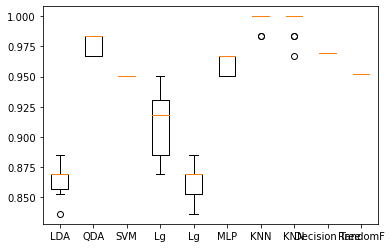

In [423]:
recall=m1.score_return("Recall")[1]
recall_list.append(recall)

names.append("RandomF")

ax = fig.add_subplot(111)
plt.boxplot(recall_list,labels=names)
# ax.xticks(labels=names)
# plt.show()
# # plt.boxplot(recall_list)
# plt.ylim([np.min(recall_list),np.max(recall_list)+0.001])

# plt.yticks(np.arange(np.min(recall_list), np.max(recall_list), 0.0001))


plt.show()

<b> Conclusion : </b> Decision Tree is have less variance so DT is good competeitor but Still Arbitrary Decision boundry win
<br>
**In The Race Now Winners Are**: ["QDA","MLP","DT","RF"] 

<b> Final Winner </b>:  Because random forest have good diversity for futuristics data